In [54]:
%matplotlib inline

In [55]:
from MetaTrader5 import *
from datetime import date
import pandas as pd
import numpy as np

import MetaTrader5 as mt5

import matplotlib.pyplot as plt

In [56]:
mt5.initialize()

True

In [57]:
!cd

C:\Users\Administrator\Desktop\exness_python_mt5\latency_test


### download REER data here : https://www.bruegel.org/publications/datasets/real-effective-exchange-rates-for-178-countries-a-new-database/#:~:text=DOWNLOAD%20DATASET&text=The%20real%20effective%20exchange%20rate,economic%20research%20and%20policy%20analysis.

In [58]:
reer = pd.read_csv(r'\Users\Administrator\Desktop\REER.csv', index_col='Date')
reer.index = pd.to_datetime(reer.index)
reer.tail()

,Singapore,Australia,Canada,Switzerland,UK,Japan,New Zealand,Euro Area
Date,,,,,,,,
2020-01-03,116.67,88.38,76.92,93.52,83.02,100.36,96.10,87.40
2020-01-04,117.48,90.08,76.72,89.61,84.29,101.64,96.46,87.19
2020-01-05,117.15,92.25,77.08,90.98,83.22,101.93,96.74,87.07
2020-01-06,117.03,95.97,79.34,92.91,82.66,99.57,99.75,88.23
2020-01-07,116.78,97.02,79.48,93.80,82.71,99.48,101.07,88.96


In [59]:
reer = reer[['Australia', 'Euro Area', 'UK', 'New Zealand']]

In [60]:
# Calculate the rolling mean of reer
reer_mean = reer.rolling(6).mean()
reer_mean.tail()

,Australia,Euro Area,UK,New Zealand
Date,,,,
2020-01-03,94.073333,85.746667,85.185000,99.023333
2020-01-04,93.193333,85.928333,85.258333,98.830000
2020-01-05,92.635000,86.165000,84.905000,98.535000
2020-01-06,92.648333,86.608333,84.333333,98.311667
2020-01-07,92.925000,87.233333,83.743333,98.280000


In [61]:
signal = reer < reer_mean
signal.tail()

,Australia,Euro Area,UK,New Zealand
Date,,,,
2020-01-03,True,False,True,True
2020-01-04,True,False,True,True
2020-01-05,True,False,True,True
2020-01-06,False,False,True,False
2020-01-07,False,False,True,False


In [62]:
signal = signal[signal] 
signal.tail()

,Australia,Euro Area,UK,New Zealand
Date,,,,
2020-01-03,1.0,NaN,1.0,1.0
2020-01-04,1.0,NaN,1.0,1.0
2020-01-05,1.0,NaN,1.0,1.0
2020-01-06,NaN,NaN,1.0,NaN
2020-01-07,NaN,NaN,1.0,NaN


In [63]:
signal = signal.fillna(-1.0)
signal.tail()

,Australia,Euro Area,UK,New Zealand
Date,,,,
2020-01-03,1.0,-1.0,1.0,1.0
2020-01-04,1.0,-1.0,1.0,1.0
2020-01-05,1.0,-1.0,1.0,1.0
2020-01-06,-1.0,-1.0,1.0,-1.0
2020-01-07,-1.0,-1.0,1.0,-1.0


## Import currency data

In [84]:
rates = mt5.copy_rates_from_pos("NZDUSD", mt5.TIMEFRAME_D1, 0, 843)

In [85]:
rates_frame = pd.DataFrame(rates)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [86]:
rates_frame

,time,open,high,low,close,tick_volume,spread,real_volume
0,2018-01-02,0.71208,0.71295,0.70958,0.70976,18435,7,0
1,2018-01-03,0.70977,0.71097,0.70729,0.70863,24984,8,0
2,2018-01-04,0.70864,0.71628,0.70728,0.71548,24599,7,0
3,2018-01-05,0.71548,0.71860,0.71444,0.71663,24669,8,0
4,2018-01-08,0.71705,0.71835,0.71550,0.71736,22607,9,0
...,...,...,...,...,...,...,...,...
838,2020-09-14,0.66861,0.67173,0.66762,0.66970,16868,12,0
839,2020-09-15,0.66970,0.67360,0.66833,0.67084,18139,12,0
840,2020-09-16,0.67084,0.67586,0.67020,0.67226,24534,12,0
841,2020-09-17,0.67225,0.67681,0.66746,0.67628,25930,12,0


In [87]:
nzd = rates_frame[['time','close']]

In [73]:
aud.rename(columns = {'time':'Date','close':'AUDUSD'}, inplace=True)
aud = aud.set_index('Date')
aud.to_csv('aud2018.csv')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [78]:
eur.rename(columns = {'time':'Date','close':'EURUSD'}, inplace=True)
eur = eur.set_index('Date')
eur.to_csv('eur2018.csv')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [83]:
gbp.rename(columns = {'time':'Date','close':'GBPUSD'}, inplace=True)
gbp = gbp.set_index('Date')
gbp.to_csv('gbp2018.csv')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [88]:
nzd.rename(columns = {'time':'Date','close':'NZDUSD'}, inplace=True)
nzd = nzd.set_index('Date')
nzd.to_csv('nzd2018.csv')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [89]:
currency = pd.concat([aud,eur,gbp,nzd],axis=1)

In [90]:
currency.dropna(inplace=True)

In [91]:
currency

,AUDUSD,EURUSD,GBPUSD,NZDUSD
Date,,,,
2018-01-03,0.78261,1.20102,1.35107,0.70863
2018-01-04,0.78631,1.20661,1.35512,0.71548
2018-01-05,0.78623,1.20301,1.35657,0.71663
2018-01-08,0.78447,1.19698,1.35696,0.71736
2018-01-09,0.78105,1.19282,1.35295,0.71437
...,...,...,...,...
2020-09-13,0.72818,1.18403,1.28066,0.66862
2020-09-14,0.72828,1.18668,1.28484,0.66970
2020-09-15,0.72950,1.18418,1.28828,0.67084


In [92]:
currency_returns = currency.pct_change()
currency_returns.tail()

,AUDUSD,EURUSD,GBPUSD,NZDUSD
Date,,,,
2020-09-13,-0.000055,-0.000245,0.000930,0.003106
2020-09-14,0.000137,0.002238,0.003264,0.001615
2020-09-15,0.001675,-0.002107,0.002677,0.001702
2020-09-16,0.000164,-0.003184,0.006000,0.002117
2020-09-17,-0.002426,0.003617,0.001134,0.005980


In [93]:
# Forward fill the signals values for all the trading days
signal.columns = ['AUDUSD', 'EURUSD', 'GBPUSD', 'NZDUSD']
signal = signal.join(pd.DataFrame(index=currency_returns.index), how='outer')
signal.fillna(method='ffill',inplace=True)
signal.tail()

,AUDUSD,EURUSD,GBPUSD,NZDUSD
Date,,,,
2020-09-13,-1.0,-1.0,1.0,-1.0
2020-09-14,-1.0,-1.0,1.0,-1.0
2020-09-15,-1.0,-1.0,1.0,-1.0
2020-09-16,-1.0,-1.0,1.0,-1.0
2020-09-17,-1.0,-1.0,1.0,-1.0


The strategy returns are computed by multiplying the currency_returns

by trading signal on the previous day. The signal value is shifted by 11 working days 

as the REER data is reported with a lag of 11 working days.

In [94]:
# Calculate the strategy returns
strategy_returns = currency_returns * signal.shift(11)
strategy_returns.dropna(inplace=True)
strategy_returns.tail()

,AUDUSD,EURUSD,GBPUSD,NZDUSD
Date,,,,
2020-09-13,0.000055,0.000245,0.000930,-0.003106
2020-09-14,-0.000137,-0.002238,0.003264,-0.001615
2020-09-15,-0.001675,0.002107,0.002677,-0.001702
2020-09-16,-0.000164,0.003184,0.006000,-0.002117
2020-09-17,0.002426,-0.003617,0.001134,-0.005980


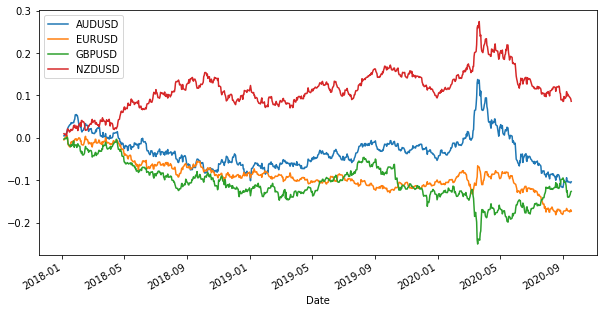

In [95]:
# Plot the strategy returns for the individual currency pairs
import matplotlib.pyplot as plt
strategy_returns.cumsum().plot(figsize=[10,5])
plt.show()

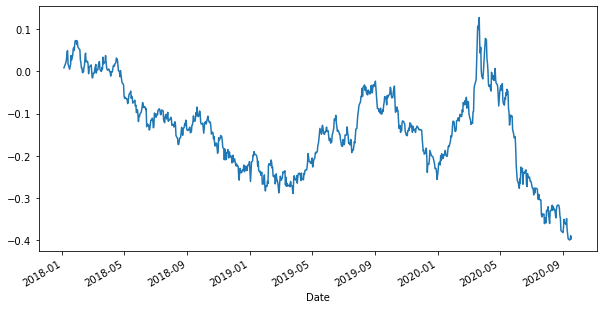

In [96]:
# Plot the combined strategy returns for all the currency pairs
leverage = 5.0
daily_ret = strategy_returns.sum(axis=1) / 4.0 * leverage
daily_ret.cumsum().plot(figsize=[10,5])
plt.show()

In [97]:
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

def CAGR(returns):
    cumulative_returns = returns.cumsum().iloc[-1]   
    period_in_days = len(returns)
    return 100*((cumulative_returns+1)**(252.0/period_in_days)-1)

print('Sharpe Ratio: ', round(annualized_sharpe_ratio(daily_ret),2))
print('CAGR: ', round(CAGR(daily_ret),2))

Sharpe Ratio:  -0.58
CAGR:  -14.07
